# 一、 基本要求

In [1]:
import numpy as np
import time
import pandas as pd
import operator
from sklearn import model_selection
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression as lrs
from collections import Counter
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# 导入数据
def Img2Mat(fileName):
    data = open(fileName)
    s = data.readlines()
    l = len(s)
    data.close()
    returnMat = np.zeros((l,256))
    returnClassVector = np.zeros((l,1))
    for i in range(l):
        s1 = s[i].split()
        for j in range(256):
            returnMat[i][j] = float(s1[j])
        clCount = 0
        for j in range(256,266):
            if s1[j] != '1':
                clCount += 1
            else:
                break
        returnClassVector[i] = clCount
    return returnMat,returnClassVector

In [3]:
X,y = Img2Mat('semeion.data')
np.shape(X), np.shape(y)

((1593, 256), (1593, 1))

In [4]:
import numpy as np
from collections import Counter
from sklearn.model_selection import LeaveOneOut

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KNN:

    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i][0] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

def cross_validation(X, y, k, cv):
    loo = LeaveOneOut()
    accuracies = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        classifier = KNN(k=k)
        classifier.fit(X_train, y_train)
        predictions = classifier.predict(X_test)
        accuracy = np.sum(predictions == y_test) / len(y_test)
        accuracies.append(accuracy)
    return np.mean(accuracies)

In [5]:
loo=LeaveOneOut()
accuracy=cross_validation(X,y,1,loo)
print(f'k=1，Accuracy: {accuracy}')

k=1，Accuracy: 0.9158819836785939


In [6]:
loo=LeaveOneOut()
accuracy=cross_validation(X,y,3,loo)
print(f'k=3，Accuracy: {accuracy}')

k=3，Accuracy: 0.9190207156308852


In [7]:
loo=LeaveOneOut()
accuracy=cross_validation(X,y,5,loo)
print(f'k=5，Accuracy: {accuracy}')

k=5，Accuracy: 0.9152542372881356


# 二、 中级要求

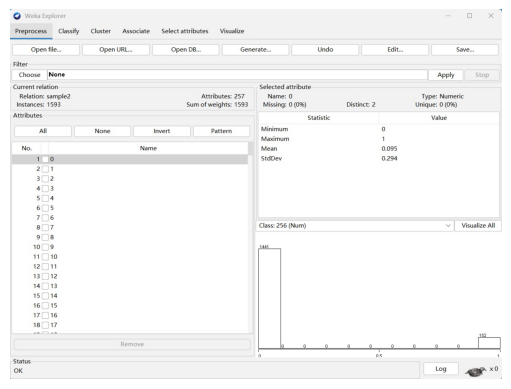

In [11]:
import cv2
import matplotlib.pyplot as plt

image_path = 'C:\\Users\\LENOVO\\Desktop\\ex1\\1.jpg'

img = cv2.imread(image_path)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')  
plt.show()


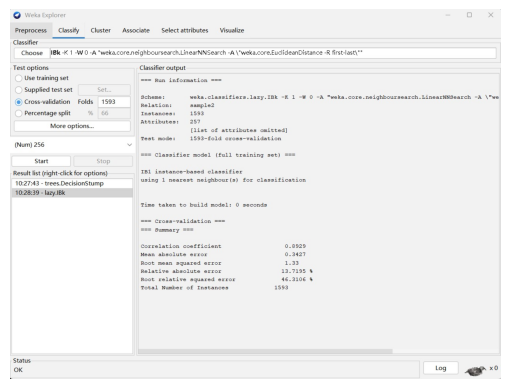

In [12]:
#k=1
import cv2
import matplotlib.pyplot as plt

image_path = 'C:\\Users\\LENOVO\\Desktop\\ex1\\2.jpg'

img = cv2.imread(image_path)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')  
plt.show()

In [13]:
# kNN算法sklearn库实现
def KnnClassifier(data_X, data_y, neighbors, flag=0):
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2)
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train, y_train.ravel())
    print('k={0}时，scikit-learn训练手写体识别的准确率为：{1}'.format(neighbors,knn.score(X_test, y_test)))
    # 交叉验证
    if flag == 1:
        scores = cross_val_score(knn,data_X,data_y.ravel(),cv=10,scoring='accuracy')
        return scores.mean()

In [14]:
KnnClassifier(X, y, 1)
KnnClassifier(X, y, 3)
KnnClassifier(X, y, 5)

k=1时，scikit-learn训练手写体识别的准确率为：0.9090909090909091
k=3时，scikit-learn训练手写体识别的准确率为：0.9059561128526645
k=5时，scikit-learn训练手写体识别的准确率为：0.9184952978056427


# 三、 高级要求

In [20]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam, RMSprop
from keras.regularizers import l2
                                                                                                    
X,y = Img2Mat('semeion.data')
X = X.reshape(-1, 16, 16, 1)
# 数据归一化
X = X / 255.0
# 标签编码
y = to_categorical(y)

# 数据增强
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
datagen.fit(X)

# 创建模型
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(16, 16, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 学习率衰减
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=5, min_lr=0.0001)

#早停
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# 编译模型
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 训练模型
model.fit(datagen.flow(X, y, batch_size=32), steps_per_epoch=len(X)/32, epochs=50, callbacks=[reduce_lr])

Epoch 1/50
49/49 [==============================] - 2s 12ms/step - loss: 3.0220 - accuracy: 0.2065 - lr: 1.0000e-04
Epoch 2/50
49/49 [==============================] - 1s 12ms/step - loss: 2.3399 - accuracy: 0.3315 - lr: 1.0000e-04
Epoch 3/50
49/49 [==============================] - 1s 12ms/step - loss: 2.0570 - accuracy: 0.3898 - lr: 1.0000e-04
Epoch 4/50
49/49 [==============================] - 1s 13ms/step - loss: 1.9042 - accuracy: 0.4300 - lr: 1.0000e-04
Epoch 5/50
49/49 [==============================] - 1s 12ms/step - loss: 1.8190 - accuracy: 0.4677 - lr: 1.0000e-04
Epoch 6/50
49/49 [==============================] - 1s 12ms/step - loss: 1.7419 - accuracy: 0.4865 - lr: 1.0000e-04
Epoch 7/50
49/49 [==============================] - 1s 12ms/step - loss: 1.6446 - accuracy: 0.5148 - lr: 1.0000e-04
Epoch 8/50
49/49 [==============================] - 1s 13ms/step - loss: 1.5854 - accuracy: 0.5267 - lr: 1.0000e-04
Epoch 9/50
49/49 [==============================] - 1s 13ms/step - loss: